# Boxplots

die Zugrundeliegende Theorie findet man [hier](https://github.com/JHC90/Basic-DataScience-Skills/wiki/EDA_4_ExploringData_Boxplot)

In [6]:
# Data, hier nehme ich den Chrun-Datensatz
# Bibliotheken
import pandas as pd
dfChrun = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#dfChrun.info()
#dfChrun

## SNS-Box-Plots

In [7]:
import seaborn as sns

### einfache Darstellung

in seaborn können unterschiedliche [Farbstyles](https://seaborn.pydata.org/tutorial/aesthetics.html) gewählt werden
bsp "whitegrid", 

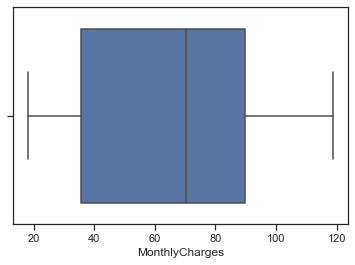

In [8]:
sns.set(style="ticks") # (style="white")(style="ticks")(style="darkgrid")(style="whitegrid")(style="ticks")(style="ticks")
ax = sns.boxplot(x=dfChrun["MonthlyCharges"]) # hier definiert man welche Vairbale auf den Plot soll

### Einfache Darstellung gesamtes DF
somit werden lediglich die Numerischen Variablen geplottet => logisch geht ja auch nciht anders

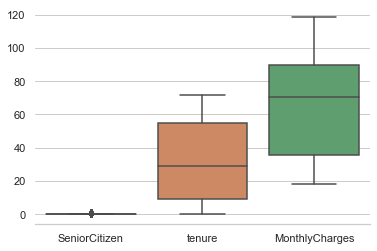

In [10]:
sns.set_style("whitegrid")
sns.boxplot(data=dfChrun, palette="deep")
sns.despine(left=True)

In [ ]:
### box plot grouped by category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

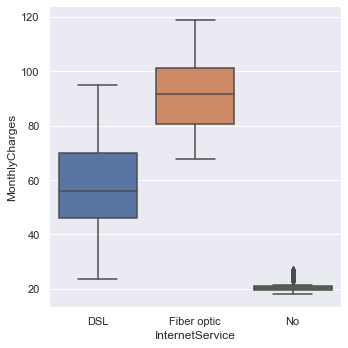

In [21]:
dfChrun.info()
sns.catplot(x="InternetService", y="MonthlyCharges", kind="box", data=dfChrun);

### Nested Boxplot
rentiert sich wenn eine binäre Variable inkludiert ist.(bspw m/f // ja/nein // usw). in dem exemplarischen Datensatz habe ich gender inkludiert. Das ist brutal zickig, da muss davor sichergestellt sein, dass im df keine Leerwert etc sind

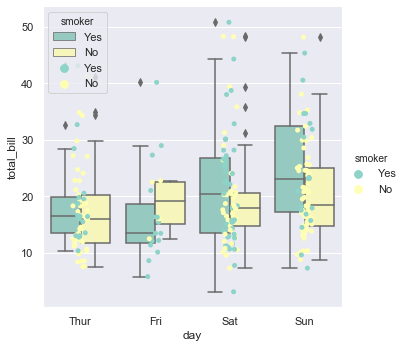

In [26]:
# Andere Datenbasis => nicht Chrun
tips = sns.load_dataset("tips")
#print(tips.info())
ax = sns.catplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3") # x = categorry, y = float64, smoker = category
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3") # x = categorry, y = float64, smoker = category
#tips.info()
#print(tips.day.unique())

### Styles von Seaborn

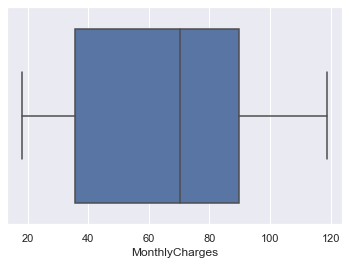

In [13]:
sns.set(style="darkgrid") # (style="white")(style="ticks")
ax = sns.boxplot(x=dfChrun["MonthlyCharges"]) # hier definiert man welche Vairbale auf den Plot soll

## Pandas Box-Plots

### Simple Pandas Boxpolot

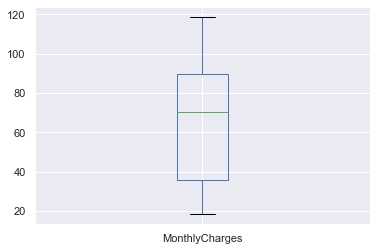

In [15]:
import pandas as pd
boxplot = dfChrun.boxplot(column=['MonthlyCharges'])

## Matplotlib mit Numpy

In [17]:
import numpy as np
import matplotlib.pyplot as plt

### Simple

{'whiskers': [<matplotlib.lines.Line2D at 0x231d0440518>,
 'caps': [<matplotlib.lines.Line2D at 0x231d0440c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x231d0440160>],
 'medians': [<matplotlib.lines.Line2D at 0x231d044a3c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x231d044a748>],
 'means': []}

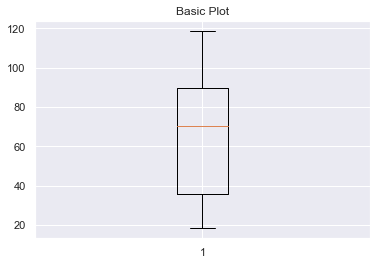

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(dfChrun['MonthlyCharges'])

### Complex

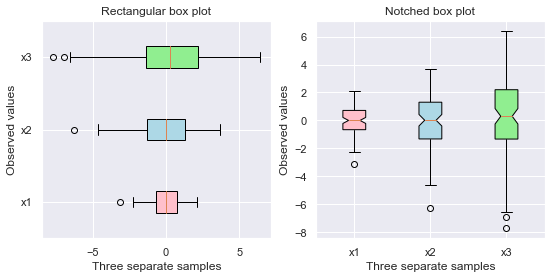

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ['x1', 'x2', 'x3']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4)) # ist für die darstellung von beiden Boxplots verantwortlich

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=False,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[0].set_title('Rectangular box plot')

# notch shape box plot // rechtes Plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
axes[1].set_title('Notched box plot')

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xlabel('Three separate samples')
    ax.set_ylabel('Observed values')

plt.show()